In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Cargar los datos en un DataFrame
df = pd.read_csv('compararsalaries.csv')

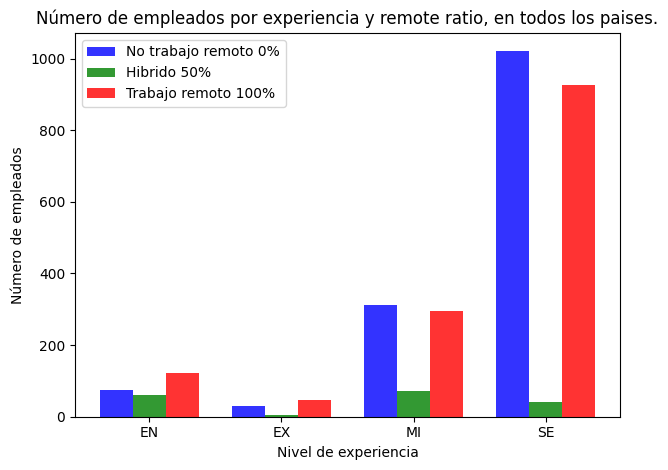

In [2]:
# filtrar el dataframe original para obtener solo los remote_ratio 0, 50 y 100
df_filtered = df[df['remote_ratio'].isin([0, 50, 100])]

# agrupar por experience_level y remote_ratio y contar cuántos trabajan en cada combinación
grouped = df_filtered.groupby(['experience_level', 'remote_ratio']).size().unstack()

# crear el gráfico de barras agrupados
fig, ax = plt.subplots()
index = np.arange(len(grouped.index))
bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(index, grouped[0], bar_width, alpha=opacity, color='b', label='No trabajo remoto 0%')
rects2 = ax.bar(index + bar_width, grouped[50], bar_width, alpha=opacity, color='g', label='Hibrido 50%')
rects3 = ax.bar(index + 2*bar_width, grouped[100], bar_width, alpha=opacity, color='r', label='Trabajo remoto 100%')

ax.set_xlabel('Nivel de experiencia')
ax.set_ylabel('Número de empleados')
ax.set_title('Número de empleados por experiencia y remote ratio, en todos los paises.')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(grouped.index)
ax.legend()

fig.tight_layout()

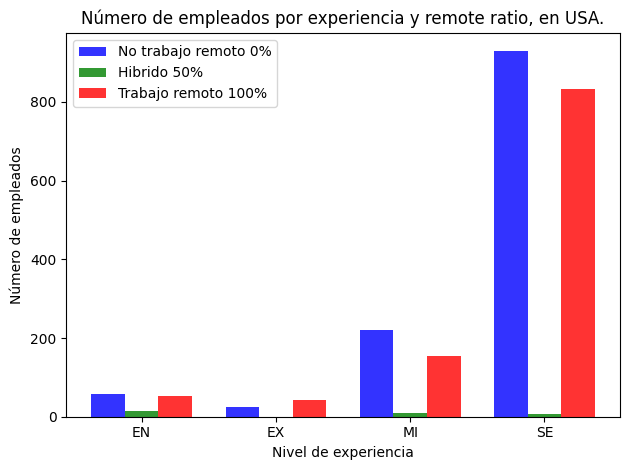

In [3]:
# filtrar el dataframe original para obtener solo los remote_ratio 0, 50 y 100
df_filtered = df.loc[df['employee_residence'] == 'US'].loc[df['remote_ratio'].isin([0, 50, 100])]

# agrupar por experience_level y remote_ratio y contar cuántos trabajan en cada combinación
grouped = df_filtered.groupby(['experience_level', 'remote_ratio']).size().unstack()

# crear el gráfico de barras agrupados
fig, ax = plt.subplots()
index = np.arange(len(grouped.index))
bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(index, grouped[0], bar_width, alpha=opacity, color='b', label='No trabajo remoto 0%')
rects2 = ax.bar(index + bar_width, grouped[50], bar_width, alpha=opacity, color='g', label='Hibrido 50%')
rects3 = ax.bar(index + 2*bar_width, grouped[100], bar_width, alpha=opacity, color='r', label='Trabajo remoto 100%')

ax.set_xlabel('Nivel de experiencia')
ax.set_ylabel('Número de empleados')
ax.set_title('Número de empleados por experiencia y remote ratio, en USA.')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(grouped.index)
ax.legend()

fig.tight_layout()

In [4]:
grouped.index.name = "Experiencia de nivel"
grouped.columns.name = "Trabajo remoto en USA."
grouped = grouped.fillna("-")
grouped

Trabajo remoto en USA.,0,50,100
Experiencia de nivel,,,
EN,57.0,14.0,52.0
EX,25.0,-,42.0
MI,221.0,10.0,155.0
SE,929.0,8.0,834.0


In [5]:
num_us_residents = len(df[df['employee_residence'] == 'US'])
print("Cantidad de empleados con residencia en Estados Unidos:", num_us_residents)


Cantidad de empleados con residencia en Estados Unidos: 2347
